In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow.keras.layers
import tensorflow as tf
import pandas as pd
import os

In [68]:
def compute_confusion_matrix(true, pred):
    # Determine the number of classes ('K') from the true labels
    K = len(np.unique(true))  # number of classes
    result = np.zeros((K, K))
    for i in range(len(true)):
        result[true[i]][pred[i]] += 1
    # Return the confusion matrix
    return result


### Reading Data from CSV file

In [89]:
dataset = pd.read_csv('FourClasses.csv')
targets= pd.read_csv('Targets_0.csv')
dataset_np = dataset.to_numpy()
targets_np = targets.to_numpy()
dataset_t= dataset_np[:,1:]
targets_t= targets_np[:,1]

[0 0 0 ... 3 3 3]
[[   0    0]
 [   1    0]
 [   2    0]
 ...
 [3997    3]
 [3998    3]
 [3999    3]]


### Plotting the dataset

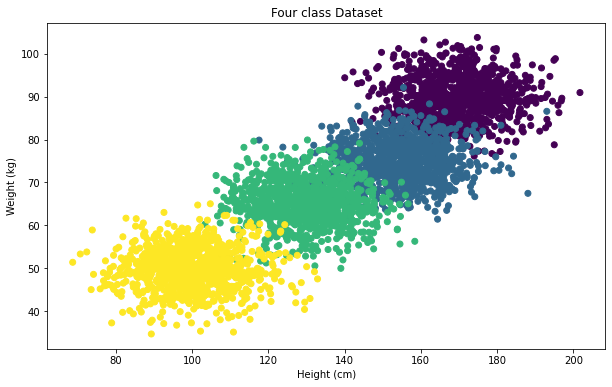

In [90]:
# Plotting the entire dataset with all classes
plt.figure(figsize=(10, 6))
plt.scatter(dataset_t[:, 0], dataset_t[:, 1], c=targets_t)
plt.title("Four class Dataset")
plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.show()

### Split the datasets into test and train

In [105]:
np.random.seed(seed=0)  # Set a seed for repeatability
permuted_idx = np.random.permutation(dataset_t.shape[0])  # Permute the sequence of the dataset

X_train = dataset_t[permuted_idx[0:3200]]
y_train = targets_t[permuted_idx[0:3200]]
X_test = dataset_t[permuted_idx[3200:]]
y_test = targets_t[permuted_idx[3200:]]

# Assuming the number of classes is 4 as given in the instruction
# Convert y_train and y_test to one-hot encoded vectors
y_train_hot = tf.one_hot(y_train,4)
y_test_hot = tf.one_hot(y_test,4)

print("Number of datapoints in X_train:", len(X_train))
print("Number of datapoints in X_test:", len(X_test))
print("Dataset Shape:", dataset_t.shape)


Number of datapoints in X_train: 3200
Number of datapoints in X_test: 800
Dataset Shape: (4000, 2)


### Build, compile and train neural network

In [108]:
model = keras.Sequential()
model.add(tensorflow.keras.layers.Dense(50, activation='sigmoid'))
model.add(tensorflow.keras.layers.Dense(50, activation='sigmoid'))
model.add(tensorflow.keras.layers.Dense(4, activation='softmax')) 

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train_hot, validation_split= 0.2, batch_size=24, epochs=100)

model.summary()




Epoch 1/100
107/107 [==============================] - 1s 3ms/step - loss: 1.3726 - accuracy: 0.3281 - val_loss: 1.3449 - val_accuracy: 0.4734
Epoch 2/100
107/107 [==============================] - 0s 1ms/step - loss: 1.3145 - accuracy: 0.4801 - val_loss: 1.3012 - val_accuracy: 0.4453
Epoch 3/100
107/107 [==============================] - 0s 1ms/step - loss: 1.2663 - accuracy: 0.5055 - val_loss: 1.2878 - val_accuracy: 0.3094
Epoch 4/100
107/107 [==============================] - 0s 1ms/step - loss: 1.2165 - accuracy: 0.5621 - val_loss: 1.2258 - val_accuracy: 0.3453
Epoch 5/100
107/107 [==============================] - 0s 2ms/step - loss: 1.1530 - accuracy: 0.5793 - val_loss: 1.1355 - val_accuracy: 0.6047
Epoch 6/100
107/107 [==============================] - 0s 1ms/step - loss: 1.0812 - accuracy: 0.6078 - val_loss: 1.0676 - val_accuracy: 0.6313
Epoch 7/100
107/107 [==============================] - 0s 1ms/step - loss: 1.0157 - accuracy: 0.6133 - val_loss: 1.0123 - val_accuracy: 0.6313

In [110]:
y_pred= model.predict(X_test)
y_pred_class = np.argmax(y_pred, axis=-1)

# Initialize a list to hold the converted class labels
y_pred_labels = []

# Use a for loop and if/else statements to convert 'y_pred_class' to the predefined classes "0", "1", "2", etc.
for pred in y_pred_class:
    if pred == 0:
        y_pred_labels.append("0")
    elif pred == 1:
        y_pred_labels.append("1")
    elif pred == 2:
        y_pred_labels.append("2")
    elif pred == 3:
        y_pred_labels.append("3")

25/25 [==============================] - 0s 937us/step


### Calculate Confusion Matrix and Accuracy

In [112]:
confusion_mx = compute_confusion_matrix(y_test, y_pred_class)
print(confusion_mx)

# Compute multi-class classification accuracy
accuracy = np.sum(np.diag(confusion_mx)) / np.sum(confusion_mx) * 100
print("Accuracy:", accuracy, "%")

[[194.   6.   0.   0.]
 [ 13. 187.  11.   0.]
 [  0.  10. 190.   5.]
 [  0.   0.   1. 183.]]
Accuracy: 94.25 %


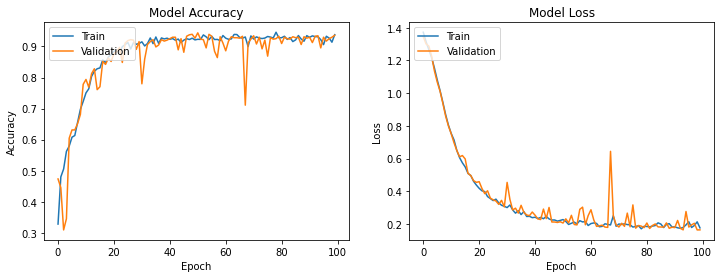

In [113]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()